<a href="https://colab.research.google.com/github/HeshanNavindu-7/Brain-Tumor-MRI/blob/main/Brain_Tumor_InceptionResNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import opendatasets as od
import os
import random
import matplotlib.pyplot as plt
import cv2

In [3]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:00<00:00, 225MB/s]


In [4]:
#define path
dataset_dir="/content/brain-tumor-mri-dataset"
class_count={}
for mri_class in os.listdir(dataset_dir):
  print(mri_class)
  class_dir= os.path.join(dataset_dir,mri_class)
  if os.path.isdir(class_dir):
    num_images=len(os.listdir(class_dir))
    class_count[mri_class]=num_images


Training
Testing


Train Data Samples:
Displaying 4 samples from 'glioma' class:
Displaying 4 samples from 'meningioma' class:
Displaying 4 samples from 'notumor' class:
Displaying 4 samples from 'pituitary' class:


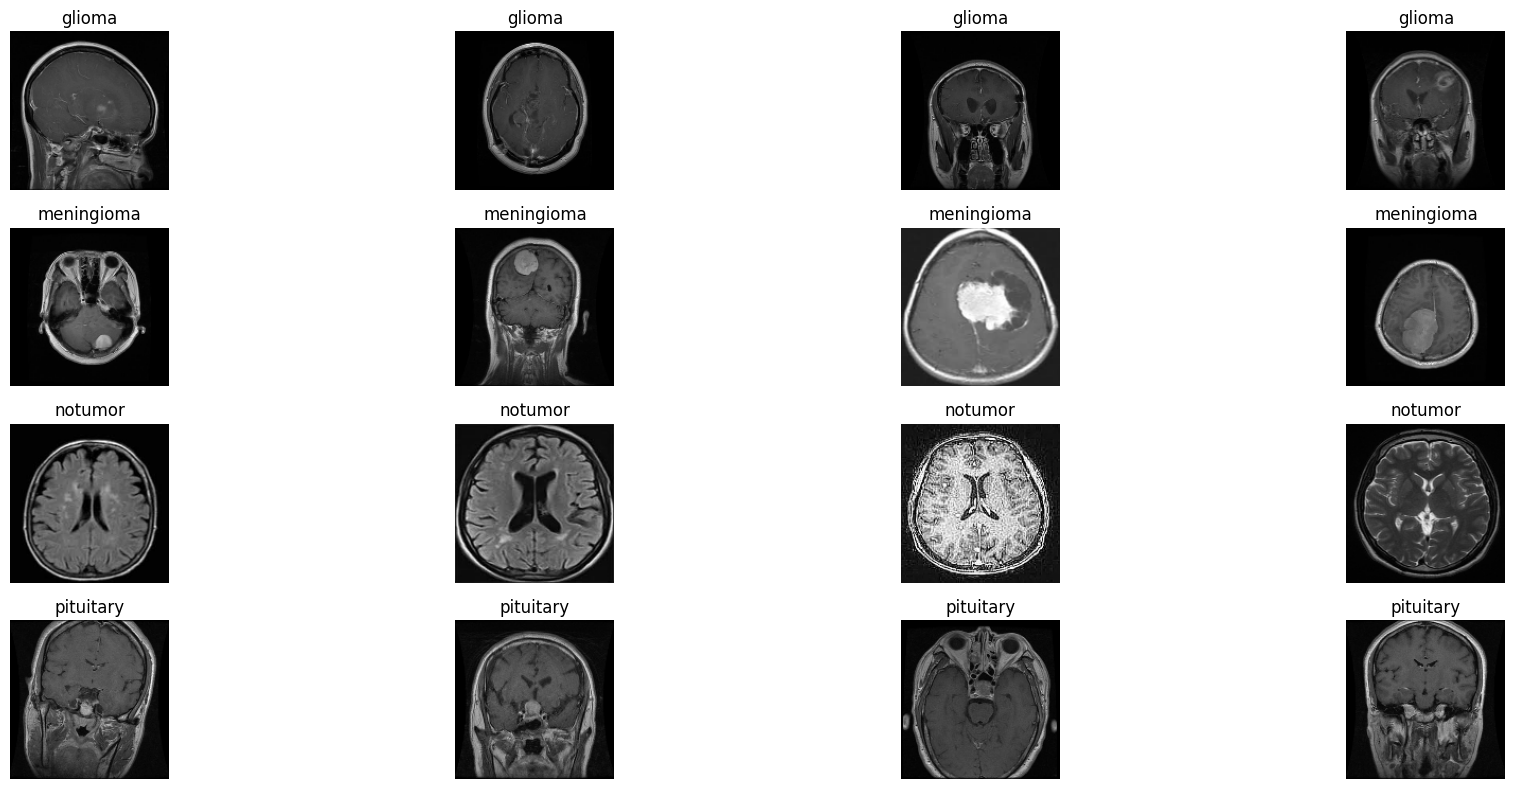

Test Data Samples:
Displaying 4 samples from 'glioma' class:
Displaying 4 samples from 'meningioma' class:
Displaying 4 samples from 'notumor' class:
Displaying 4 samples from 'pituitary' class:


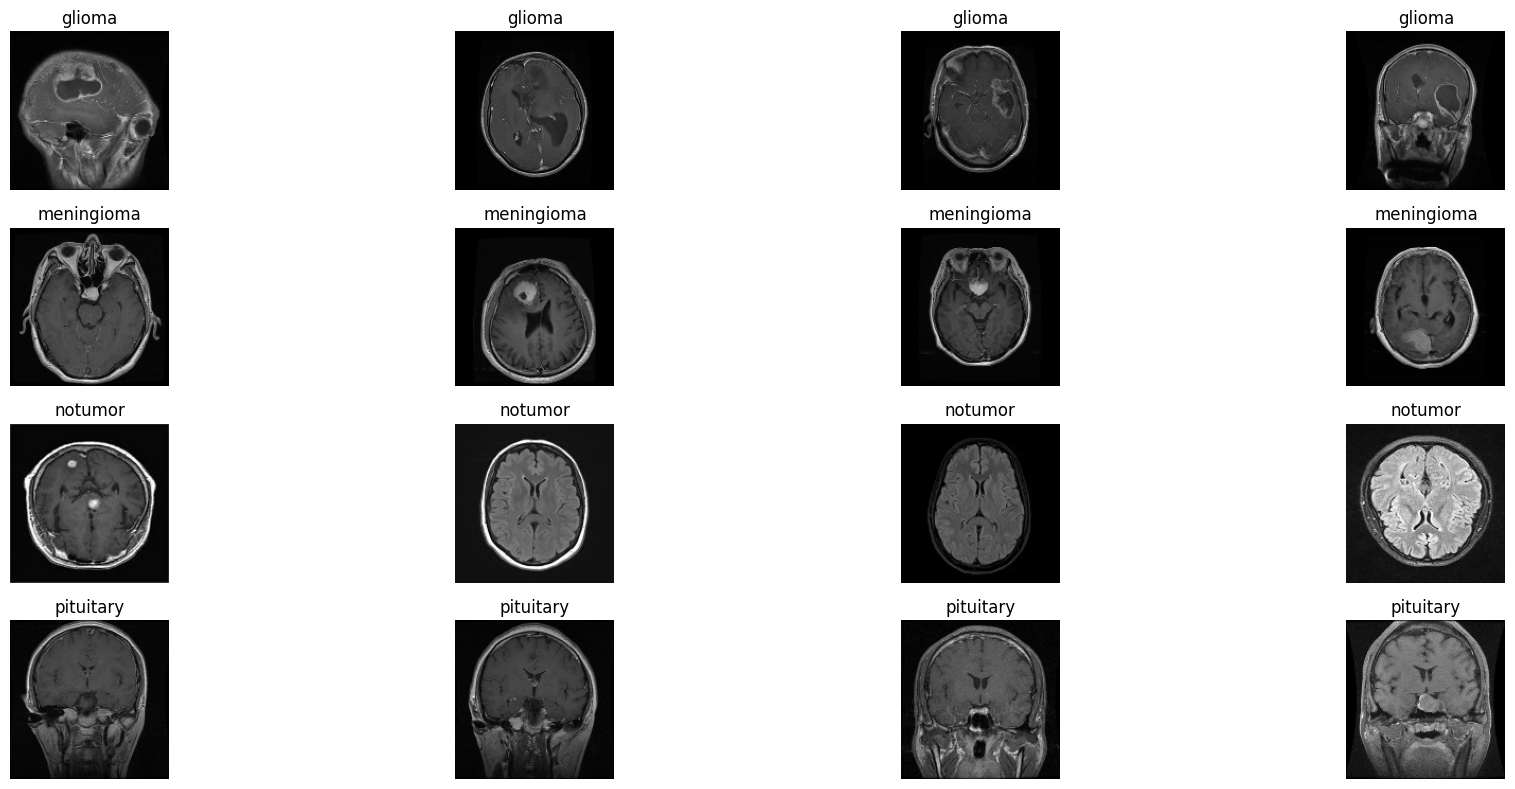

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Define subdirectories for train and test data
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Define classes
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

def display_sample(directory, num_samples=4):
    # Create a grid of subplots for displaying images
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(20, 8))

    # Loop over each class
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        print(f"Displaying {num_samples} samples from '{class_name}' class:")

        # Loop over sample images in the current class directory
        for j, filename in enumerate(os.listdir(class_dir)):
            if j >= num_samples:
                break

            # Read and preprocess the image
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, target_size)  # Resize image

            # Display the image on the corresponding subplot
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(class_name)

    # Adjust spacing between subplots and display the plot
    plt.tight_layout()
    plt.show()

# Display sample data from the train directory
print("Train Data Samples:")
display_sample(train_dir)

# Display sample data from the test directory
print("Test Data Samples:")
display_sample(test_dir)


In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define subdirectories for train and test data
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

# Define image size and batch size
target_size = (299, 299)  # Change from (150, 150) to (299, 299)
batch_size = 32


# Define data generators for train and test data with augmentation and validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set validation split
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow train images from directory with validation split
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # Same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Flow test images from directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the InceptionResNetV2 model pre-trained on ImageNet
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionResNetV2 to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Define the custom model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
print(model.summary())

219055592/219055592 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 98304)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               50332160  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 104670948 (399.29 MB)
Trainable params:

In [12]:
# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/10
142/142 [==============================] - 231s 2s/step - loss: 1.0914 - accuracy: 0.7255 - val_loss: 0.8292 - val_accuracy: 0.6911
Epoch 2/10
142/142 [==============================] - 215s 2s/step - loss: 0.5185 - accuracy: 0.8048 - val_loss: 0.7380 - val_accuracy: 0.7196
Epoch 3/10
142/142 [==============================] - 214s 2s/step - loss: 0.4658 - accuracy: 0.8297 - val_loss: 0.6899 - val_accuracy: 0.7464
Epoch 4/10
142/142 [==============================] - 214s 2s/step - loss: 0.4375 - accuracy: 0.8398 - val_loss: 0.6765 - val_accuracy: 0.7545
Epoch 5/10
142/142 [==============================] - 215s 2s/step - loss: 0.4115 - accuracy: 0.8489 - val_loss: 0.6130 - val_accuracy: 0.7643
Epoch 6/10
142/142 [==============================] - 216s 2s/step - loss: 0.4012 - accuracy: 0.8542 - val_loss: 0.6051 - val_accuracy: 0.7732
Epoch 7/10
142/142 [==============================] - 219s 2s/step - loss: 0.3773 - accuracy: 0.8636 - val_loss: 0.5917 - val_accuracy: 0.7661

In [13]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

41/41 [==============================] - 40s 975ms/step - loss: 0.3991 - accuracy: 0.8429
Test Loss: 0.3991090655326843
Test Accuracy: 0.8428680300712585


In [14]:
# Evaluate the model on test data
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

143/143 [==============================] - 160s 1s/step - loss: 0.2461 - accuracy: 0.9070
Train Loss: 0.24609829485416412
Train Accuracy: 0.9070225358009338


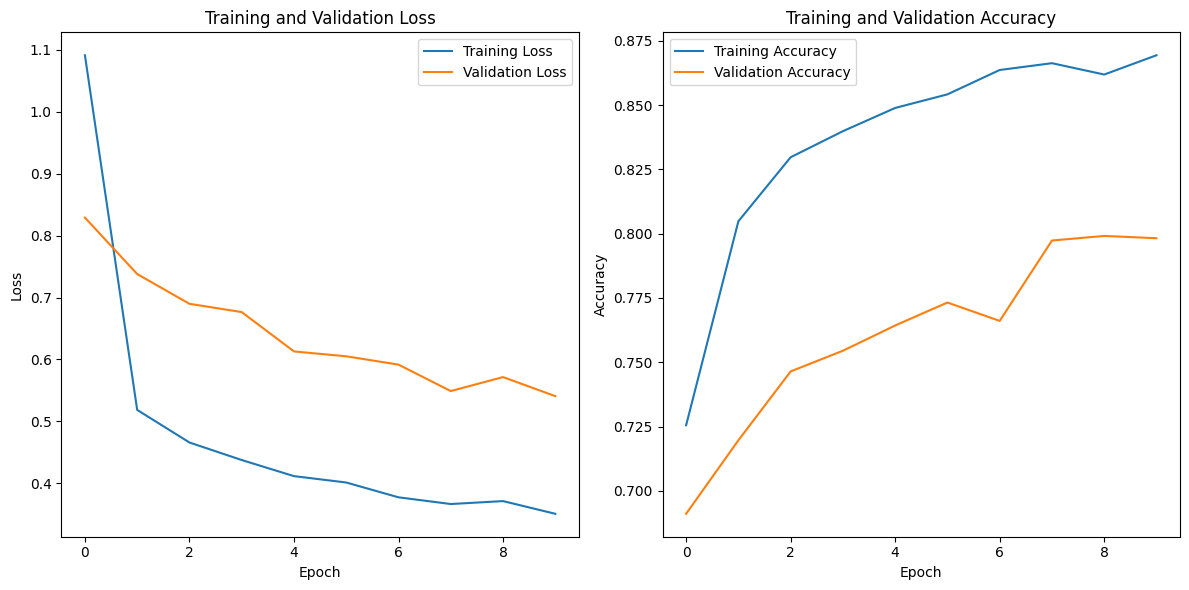

In [15]:
import matplotlib.pyplot as plt

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

41/41 [==============================] - 44s 1000ms/step


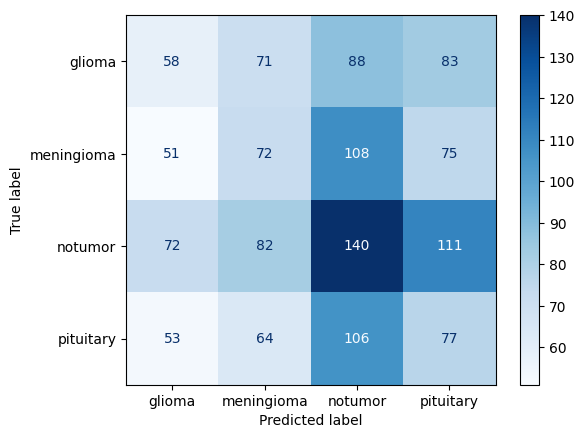

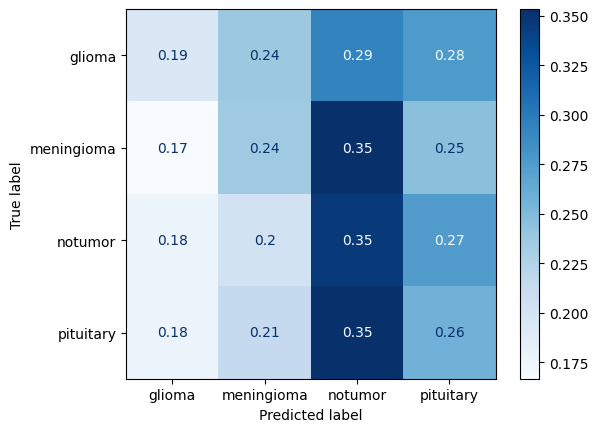

              precision    recall  f1-score   support

      glioma       0.25      0.19      0.22       300
  meningioma       0.25      0.24      0.24       306
     notumor       0.32      0.35      0.33       405
   pituitary       0.22      0.26      0.24       300

    accuracy                           0.26      1311
   macro avg       0.26      0.26      0.26      1311
weighted avg       0.26      0.26      0.26      1311



In [16]:
# Confusion Matrix and Classification Report
y_true = test_generator.classes
y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Plot Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

In [18]:

print("Results")
result = model.evaluate_generator(test_generator, verbose=1)

print("%s%.2f" % ("Loss     : ", result[0]))
print("%s%.2f%s" % ("Accuracy : ", result[1] * 100, "%"))

Results


<ipython-input-18-11f1a34e3d1a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = model.evaluate_generator(test_generator, verbose=1)


41/41 [==============================] - 11s 258ms/step - loss: 0.4228 - accuracy: 0.8429
Loss     : 0.42
Accuracy : 84.29%


41/41 [==============================] - 11s 256ms/step


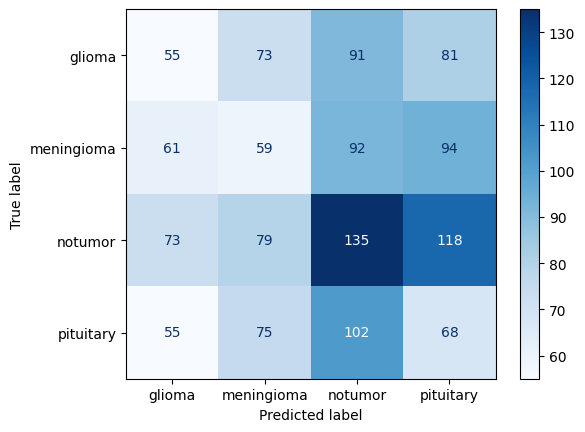

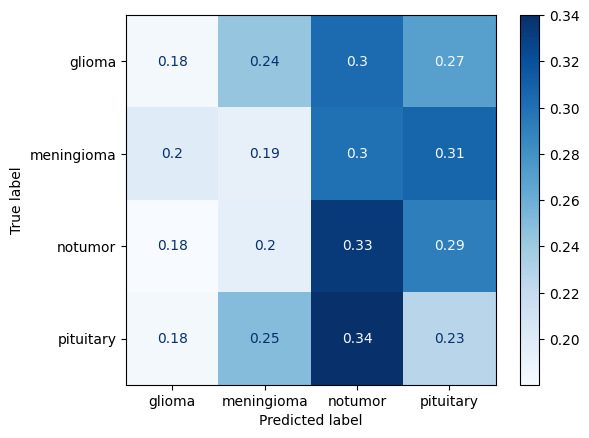

              precision    recall  f1-score   support

      glioma       0.23      0.18      0.20       300
  meningioma       0.21      0.19      0.20       306
     notumor       0.32      0.33      0.33       405
   pituitary       0.19      0.23      0.21       300

    accuracy                           0.24      1311
   macro avg       0.24      0.23      0.23      1311
weighted avg       0.24      0.24      0.24      1311



In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# Confusion Matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


In [ ]:
# Save the trained model
model.save('my_model_VGG16.keras')
model.save('saved_model_VGG16')

In [ ]:
import tensorflow as tf

# Convert the SavedModel to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_VGG16')
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model_VGG16.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_new_converter = True  # Use the new converter for better compatibility

# Save the TensorFlow Lite model to a file
with open('model_VGG16.tflite', 'wb') as f:
    f.write(tflite_model)
